In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# Read class file

In [5]:
with open('input/classification_classes_ILSVRC2012.txt', 'r') as f:
    image_net_names = f.read().split('\n')
    
class_names = image_net_names[:-1]

print(len(class_names), class_names[999])

1000 toilet tissue, toilet paper, bathroom tissue


In [6]:
config_file = 'models/DenseNet_121.prototxt'
model_file = 'models/DenseNet_121.caffemodel'
model = cv2.dnn.readNet(model=model_file, config=config_file, framework='Caffe')

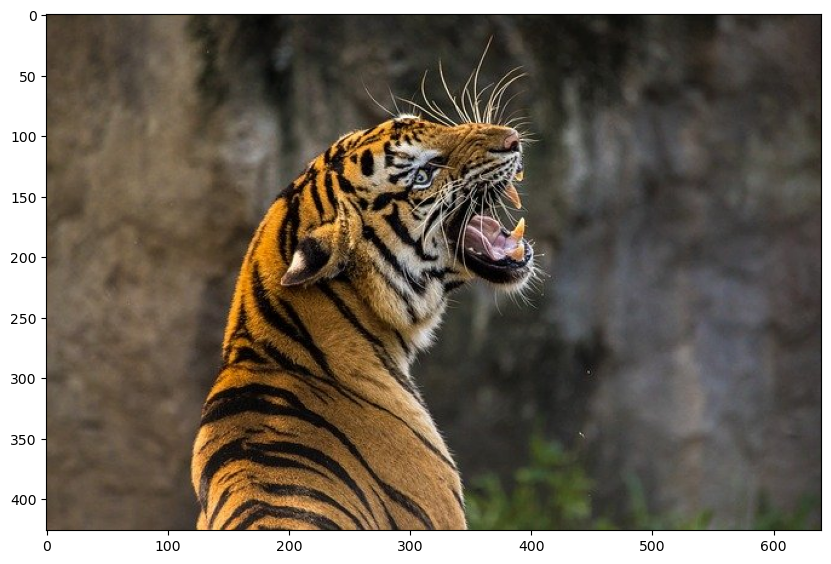

In [7]:
tiger_img = cv2.imread('input/image1.jpg')
plt.figure(figsize=[10, 10])
plt.imshow(tiger_img[:, :, ::-1]);


In [14]:
blob = cv2.dnn.blobFromImage(
    image=tiger_img, scalefactor=0.017, size=(224, 224), mean=(104, 117, 123), swapRB=False, crop=False)

In [29]:
model.setInput(blob)
outputs = model.forward()
final_outputs = outputs[0]
print(final_outputs.shape)

(1000, 1, 1)


In [18]:
final_outputs = final_outputs.reshape(1000, 1)
probs = np.exp(final_outputs) / np.sum(np.exp(final_outputs))
label_id = np.argmax(probs)
print(final_outputs[:10])
print("Max probability:", np.max(probs))

[[-1.515074  ]
 [-0.8916832 ]
 [-0.82730633]
 [-1.1041015 ]
 [-4.0807333 ]
 [-4.0849013 ]
 [-4.1644254 ]
 [ 1.5200719 ]
 [ 1.6396831 ]
 [ 0.19730392]]
Max probability: 0.9372196


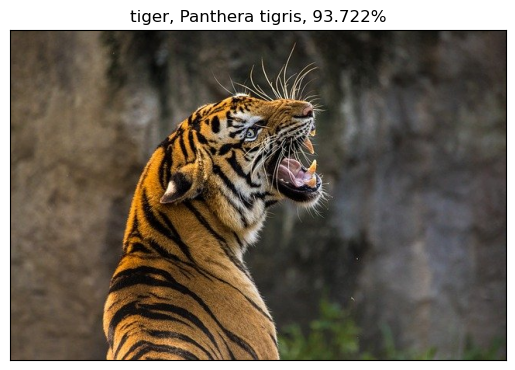

In [17]:

final_prob = np.max(probs) * 100.0

out_name = class_names[label_id]
out_text = f"{out_name}, {final_prob:.3f}%"

# Display the image, best matched classification, and confidence.
plt.imshow(tiger_img[:, :, ::-1])
plt.title(out_text)
plt.xticks([]), plt.yticks([])
plt.show() 

In [32]:
def classify(img):
    image = img.copy()
    # create blob from image
    blob = cv2.dnn.blobFromImage(image = image, scalefactor = 0.01, size = (224, 224), mean = (104, 117, 123))
    # set the input blob for the neural network
    model.setInput(blob)
    # forward pass image blob through the model
    ouputs = model.forward()
    
    final_outputs = outputs[0]
    
    # make all the outputs 1D
    final_outputs = final_outputs.reshape(1000, 1)
    # get the class label
    label_id = np.argmax(final_outputs)
    # Convert score to probabilities
    probs = np.exp(final_outputs) / np.sum(np.exp(final_outputs))
    # Get the final highest probability
    final_prob = np.max(probs) * 100
    # Map the max confidence to the class label names.
    out_name = class_names[label_id]
    out_text = f"{out_name}, {final_prob:.3f}%"
    return out_text

Classifying input\image1.jpg
Classifying input\image2.jpg
Classifying input\image3.jpg
Classifying input\image4.jpg
Classifying input\image5.jpg
Classifying input\image6.jpg


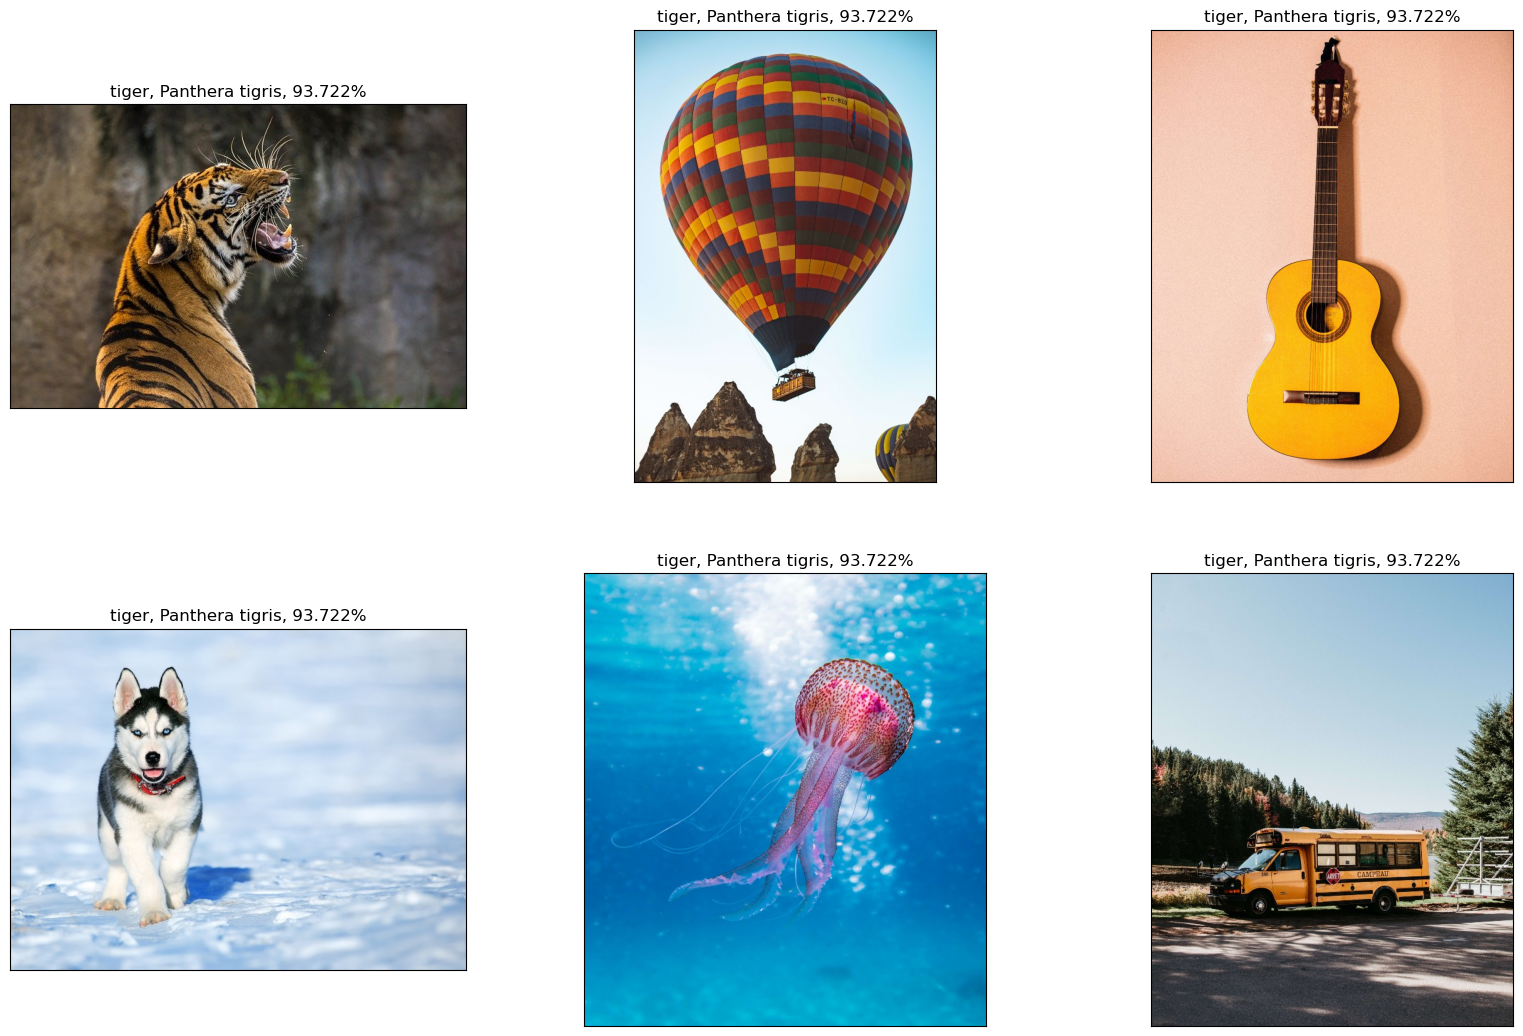

In [33]:
images = []
imageclasses = []
for img_path in glob.glob('input/*.jpg'):
    img = cv2.imread(img_path)
    images.append(img)
    print("Classifying "+img_path)
    imageclasses.append(classify(img))

plt.figure(figsize=(20, 20))

plot_count = int(len(images) / 3) + 1
for i, image in enumerate(images):
    plt.subplot(plot_count, 3, i + 1)
    plt.imshow(image[:, :, ::-1])
    plt.title(imageclasses[i])
    plt.xticks([])
    plt.yticks([])